In [2]:
import squidward.gpr as gpr
import squidward.kernels as kernels
import squidward.gp_viz as gp_viz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1D Regression Example

In [3]:
samples = 300
x = np.random.uniform(-15,15,samples)
noise = np.random.normal(0,250,samples)
y = (1-x)**3-(1-x)**2+100+noise

In [4]:
kernel = kernels.rbf(1000**2,2.0)
model = gpr.gaussian_process(kernel=kernel,var_l=750**2,inv_method='solve')
model.fit(x,y)
x_test = np.linspace(-15,15,100)
mean, var = model.posterior_predict(x_test)

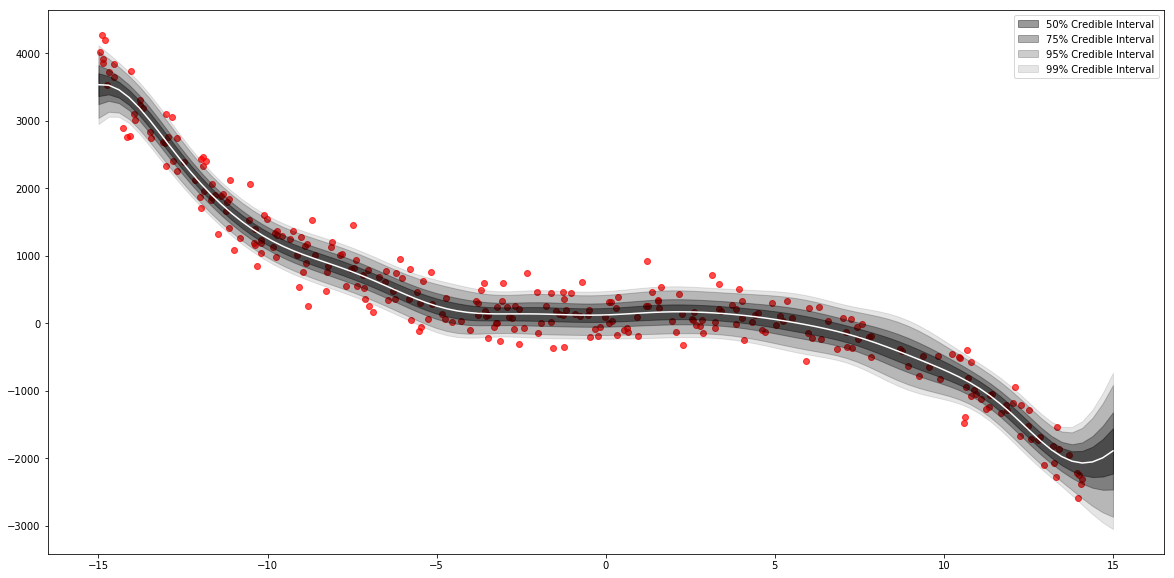

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(x,y,alpha=.7,c='r')
gp_viz.regression.plot_1d(x_test,mean,var[:,0])
plt.legend()
plt.show()

## 2D Regression Example

In [6]:
samples = (500,2)
x = np.random.uniform(-10,10,samples)
noise = np.random.normal(0,1000,samples[0])
y = (1-x[:,0])**3-(1-x[:,0])**2-50*(x[:,1])**2+noise

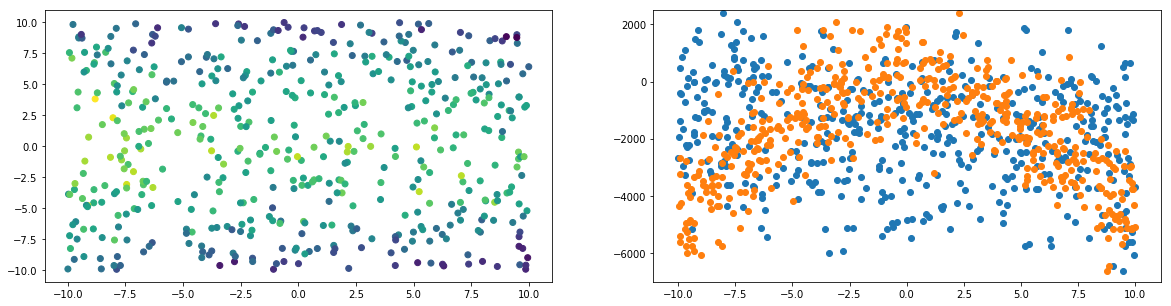

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c=y)
plt.subplot(1,2,2)
plt.scatter(x[:,0],y)
plt.scatter(x[:,1],y)
plt.ylim(-7000,2500)
plt.show()

In [8]:
kernel = kernels.rbf2(50**2,10.0)
model = gpr.gaussian_process(kernel=kernel,var_l=500**2,inv_method='inv')
model.fit(x,y)
x_test = np.mgrid[-10:10:1.0,-10:10:1.0].reshape(2,-1).T
mean, var = model.posterior_predict(x_test)

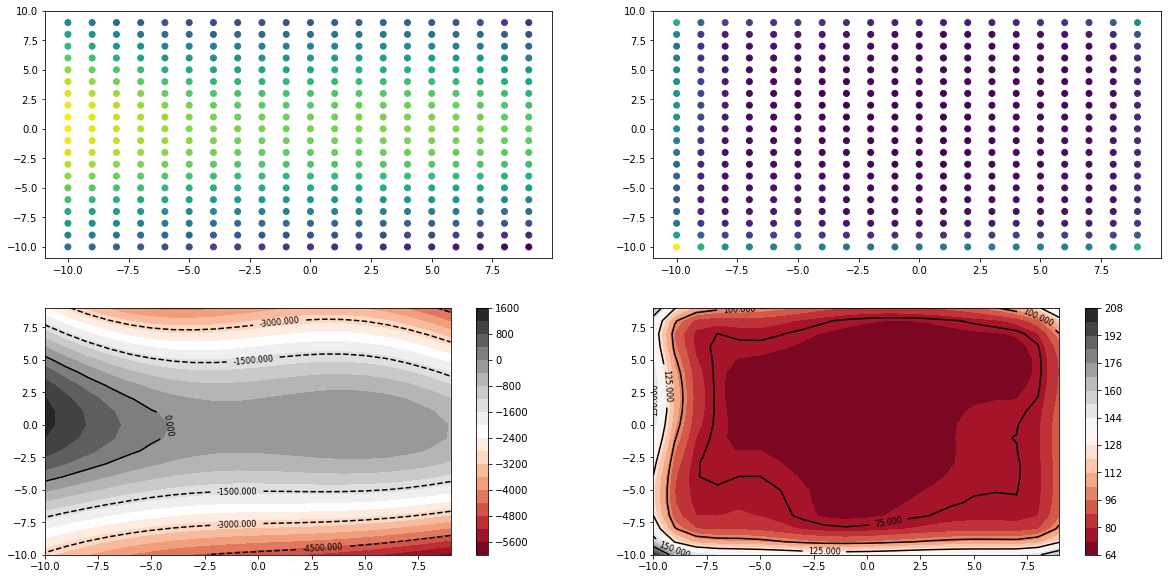

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
gp_viz.regression.point_grid(model,(-10,10,1))
plt.subplot(2,2,2)
gp_viz.regression.point_grid(model,(-10,10,1),True)
plt.subplot(2,2,3)
gp_viz.regression.contour(model,(-10,10,1))
plt.subplot(2,2,4)
gp_viz.regression.contour(model,(-10,10,1),True)
plt.show()

/anaconda3/envs/base_env/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


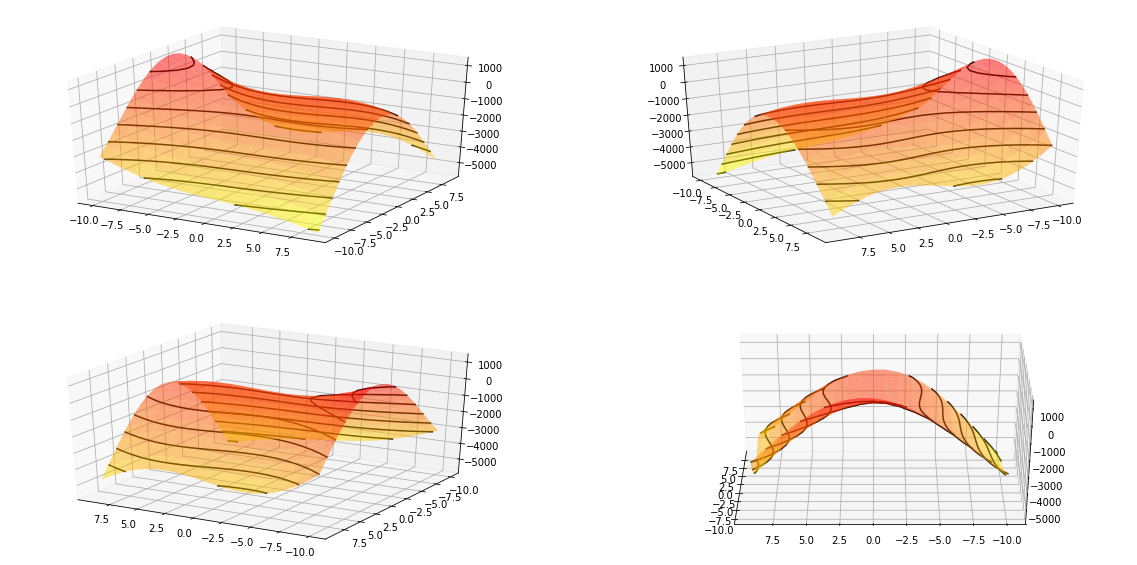

In [10]:
gp_viz.regression.plot_3d(model,(-10,10,1))
plt.show()